常微分方程问题
$$
u' = f(t,u)  \quad 0<t \leq 1, \quad u(0)=1
$$

右端项
$$
f(t,u) = -u + t^3 + 3 t^2
$$

精确解
$$
u(t) = e^{-t} + x^3
$$

改进欧拉法(Heun方法)
$$
u_{n+1} = u_n + \frac{h}{2} [f(t_n, u_n) + f(t_{n+1}, u_{n+1})], \quad n = 0, 1, ..., NP -1
$$

因为$f(t,u)$ 是关于$u$的非线性函数，我们需要求解非线性问题。 

所谓“改进欧拉法”，在维基百科中名为Heun方法。

(1)在维基百科介绍的方法以及上课讲评的的方法，使用的均是“预测-校正”格式，首先用欧拉法，根据$u_n$计算出$u_{n+1}$的预测值$u^{0}_{n+1}$，再用一步迭代计算出校正值$u^{1}_{n+1}$。

(2)但在李荣华的教材和老师的ppt上写的却是“取初值$u^{0}_{n+1}$ = u_n”，然后再迭代几步。这两者显然有比较大的区别。

在此我有疑问：
1. 这两者是否等价？还是说书上写错了？

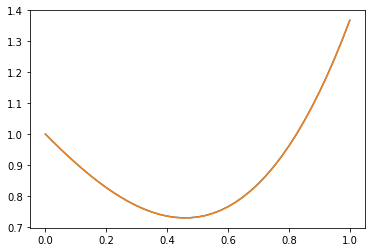

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,u):
    return -u + t ** 3 + 3 * t ** 2

def u_exact(t):
    return np.exp(-t) + t ** 3

# step 1
NT =  40 # 区间个数, 此为函数变量
NP = NT + 1 # 网点个数
a_left = 0
b_right = 1

h = (b_right-a_left)/NT # 步长
t = np.zeros([NP,1], dtype = float)
for n in range(NP): # 从 0 到 NT, NT+1=NP 个点
    t[n] = n * h

# step 2
uh_predict = np.zeros([NP,1], dtype = float) #保存预测值
uh = np.zeros([NP,1], dtype = float) #近似值，或称校正值

uh[0] = 1.0 # 初值
for n in range(NP-1): # 从 1 to NP, NP-1 个点
    uh_predict[n+1] = uh[n] + h * f(t[n], uh[n])
    uh[n+1] = uh[n] + (h/2) * ( f(t[n], uh[n]) + f( t[n+1] , uh_predict[n+1] ) ) 
    

# step 3
u = np.zeros([NP,1], dtype = float) # 计算精确值
for n in range(NP):
    u[n] = u_exact(t[n])

# plot
plt.plot(t, uh) # 画图
plt.plot(t, u)
plt.show()

In [7]:
 def err_evl_1(NT = 10): #默认输入为10
    import numpy as np
    import matplotlib.pyplot as plt

    def f(t,u):
        return -u + t ** 3 + 3 * t ** 2

    def u_exact(t):
        return np.exp(-t) + t ** 3

    # step 1
    NT = NT #  区间个数, 此为函数变量
    NP = NT + 1 # 网点个数
    a_left = 0
    b_right = 1
    
    h = (b_right-a_left)/NT # 步长
    t = np.zeros([NP,1], dtype = float)
    for n in range(NP): # 从 0 到 NT, NT+1=NP 个点
        t[n] = n * h

    # step 2
    uh_predict = np.zeros([NP,1], dtype = float) # 保存预测值
    uh = np.zeros([NP,1], dtype = float) #近似值，或称校正值

    uh[0] = 1.0 # 初值
    for n in range(NP-1): #从 1 to NP, NP-1 个点
        uh_predict[n+1] = uh[n] + h * f(t[n], uh[n])
        uh[n+1] = uh[n] + (h/2) * ( f(t[n], uh[n]) + f( t[n+1] , uh_predict[n+1] ) ) 
        

    # step 3
    u = np.zeros([NP,1], dtype = float) # 计算精确值
    for n in range(NP):
        u[n] = u_exact(t[n])

    # step 4
    err = np.abs(u - uh) # 计算最大误差
    err_max = max(err)
    return err_max

In [11]:
E = []
E_relative = []
T = [10, 20 ,40, 80, 160, 320]
T_relative = []
for NT in range(len(T)):
    E.append(err_evl_1( T[NT] )) # 调用上述主函数，计算不同步长下的误差

for N in range(1,len(T)):
    E_relative.append( float(E[N]/E[N-1]) ) # 计算前一个步长和后一个步长最大误差之比

for N in range(1,len(T)): 
    T_relative.append( float(T[N]/T[N-1] )) # 计算前一个步长和后一个步长之比

print(E_relative)
print(T_relative)

[0.24585816374700284, 0.2478807354568733, 0.2489287474379618, 0.2494615248644563, 0.24973005710934001]
[2.0, 2.0, 2.0, 2.0, 2.0]


### 总结

我们发现，（在步长减小为$1/2$时），改进欧拉法的误差的比值收敛于$1/4$，说明改进欧拉法是二阶的。